In [242]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#criar df e colunas, reorganizar  para os rings estarem em ordem crescente

df = pd.read_csv(r'C:\Users\nikit\OneDrive\Desktop\Psn\Knn\abalone.csv',header=None)



df.columns=['Sex', 'Length', 'Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']

df=df.sort_values('Rings').reset_index().drop(['index'], axis=1)

df1=df

#ocr_class é a tabela das ocorrecnias e das classes(Rings) 
#nao tenho a certeza se era isto que era preciso

ocr_class=df1['Rings'].value_counts().sort_index()

ocr_class=ocr_class.to_frame()


#transformar M em 1 e F em 0 na coluna 'Sex'

df1['Sex']=df1['Sex'].apply(lambda x: 1 if x=='M' else 0)

df1

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
1,0,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
2,1,0.210,0.150,0.050,0.0385,0.0155,0.0085,0.0100,3
3,0,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
4,0,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
...,...,...,...,...,...,...,...,...,...
4172,0,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.5100,25
4173,1,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.3750,26
4174,1,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.8850,27
4175,0,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.5250,27


In [243]:
#criação da coluna class 
df1['class']=df1['Rings']
df1['class']=df1['class'].apply(lambda x:1 if x<=5 else 16 if x>=20 else x-4)

#criar df predictors e df de class
predictors=df1.drop(['Rings','class'],axis=1)#predictors

class_=df1['class']#class


#8 
X_train,X_test,y_train,y_test=train_test_split(predictors,class_,random_state=0) 


#9
knn=KNeighborsClassifier(n_neighbors=5,metric='cityblock') # KNN com K=5
knn.fit(X_train,y_train) # train the classifier
knn.score(X_test,y_test) # test the result



0.24784688995215312

In [244]:
#10

df1['class']=df1['Rings'].apply(lambda x:1 if x<=8 else 3 if x>=11 else 2)

df1['class'].value_counts().sort_index()


# df1.to_csv("teste2.csv")

1    1407
2    1323
3    1447
Name: class, dtype: int64

In [346]:



#11

predictors=df1.drop(['Rings'],axis=1)#predictors
predictors=predictors.drop(['class'],axis=1)
class_=df1['class']#class

X_train,X_test,y_train,y_test=train_test_split(predictors,class_,random_state=0) 

knn=KNeighborsClassifier(n_neighbors=5,metric='cityblock') # KNN com K=5
knn.fit(X_train,y_train) # train the classifier
#knn.score(X_test,y_test) # test the result

X_train

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
940,0,0.375,0.280,0.080,0.2025,0.0825,0.0480,0.065
2688,1,0.615,0.505,0.165,1.1670,0.4895,0.2955,0.345
1948,0,0.520,0.410,0.145,0.6460,0.2965,0.1595,0.165
713,0,0.360,0.275,0.075,0.2205,0.0985,0.0440,0.066
3743,1,0.695,0.550,0.215,1.9565,0.7125,0.5410,0.590
...,...,...,...,...,...,...,...,...
1033,0,0.580,0.480,0.180,1.2495,0.4945,0.2700,0.371
3264,1,0.715,0.520,0.180,1.6000,0.7080,0.3525,0.445
1653,1,0.425,0.325,0.120,0.3755,0.1420,0.1065,0.105
2607,0,0.590,0.465,0.170,1.0425,0.4635,0.2400,0.270


In [264]:
#12
for x in range(5):  
        classPred=str(knn.predict([X_test.iloc[x].tolist()])[0])
        dist,indice=knn.kneighbors(X_test.iloc[x].values.reshape(1, -1), n_neighbors=5)
        print('exemplo',x,'Class_Pred ' + classPred,'distancias',dist[0],'indices dos vizinhos',indice[0])

exemplo 0 Class_Pred 1 distancias [0.0775 0.0795 0.0805 0.081  0.09  ] indices dos vizinhos [1589   64 2947 1278 2707]
exemplo 1 Class_Pred 1 distancias [0.062  0.0795 0.084  0.086  0.0875] indices dos vizinhos [2009 2184  563  770  927]
exemplo 2 Class_Pred 3 distancias [0.2015 0.2175 0.23   0.2335 0.234 ] indices dos vizinhos [1747 2494   98 1063 2092]
exemplo 3 Class_Pred 1 distancias [0.0375 0.04   0.0435 0.045  0.0465] indices dos vizinhos [1137 2763  601 2776 2231]
exemplo 4 Class_Pred 1 distancias [0.0655 0.068  0.073  0.097  0.102 ] indices dos vizinhos [ 733 1132 3065 1807 3041]


In [369]:

#13


linhas=len(X_test.index)
normal=y_test.tolist()
previsto=[]
index = X_test.index.tolist()

for x in range(linhas): 
       previsto.append(knn.predict([X_test.iloc[x].tolist()])[0])
    
cm=confusion_matrix(normal ,previsto)

cm

cm=np.transpose(cm)

actual=[1,2,3]
Tp = pd.DataFrame(list(zip(actual,cm[0],cm[1],cm[2])),
                columns = ["actual/predicted",1,2,3])

Tp.set_index('actual/predicted', inplace=True)


Tp

,1,2,3
actual/predicted,,,
1,307,44,12
2,98,138,81
3,34,127,204


In [ ]:
#14

knn=KNeighborsClassifier(n_neighbors=1,metric='cityblock') # KNN com K=1
knn.fit(X_train,y_train) # train the classifier
knn.score(X_test,y_test) 

#falta justificar

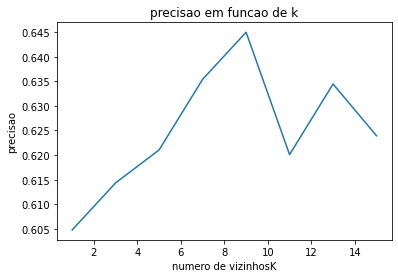

In [311]:
#15


# x axis values
x=[]
for i in range(16):
    if i % 2 != 0:
        x.append(i)
#funcao que retorna precisoes com o K a variar entre 1 e 15
def precisoes(df1):
    
    valores=[]   
    for i in x:
            knn=KNeighborsClassifier(n_neighbors=i,metric='cityblock') # KNN com K=5
            knn.fit(X_train,y_train) # train the classifier
            valores.append(knn.score(X_test,y_test)) # test the result
    return valores



# corresponding y axis values
y = precisoes(df1)
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('numero de vizinhos K')
# naming the y axis
plt.ylabel('precisao')
  
# giving a title to my graph
plt.title('precisao em funcao de k')
  
# function to show the plot
plt.show()
